读取一个部分的数据

In [1]:
import pandas as pd

tmp=pd.read_csv('data/上海2019_2023年按月分类文件/20191201_20200101 57356 条.csv')
print(len(tmp)) #数据的行数

# tmp=tmp.sample(10)
# tmp


57356


查看列名

In [51]:
tmp.columns

Index(['mid', 'lat', 'lng', 'user_name', 'user_link', 'verify_typ',
       'weibo_link', 'publish_time', 'content', 'image_urls',
       'video_preview_url', 'forward_num', 'comment_num', 'like_num',
       'phone_type', 'content_location_name', 'content_location_url',
       'wgs_lng', 'wgs_lat'],
      dtype='object')

In [ ]:
data=tmp[['mid','message','sentiment']]
data.columns=['mid','content','sentiment']
data

截取需要的列

In [3]:
# data=tmp[['user_name','publish_time','content','phone_type','content_location_name','wgs_lng','wgs_lat']]
data=tmp[['user_name','publish_time','content','content_location_name']]
data

,user_name,publish_time,content,content_location_name
0,妖洞洞柒柒,2019-12-01 00:00,欢庆下周挺进病房🙃希望这不是最后的狂欢🤓🤓 2上海·胡桃里音乐酒馆(南洋1931店) ​​​​,上海·胡桃里音乐酒馆(南洋1931店)
1,牛哄哄-0902,2019-12-01 00:00,💙 💙 💙 2上海·上海工艺美术职业学院 ​​​​,上海·上海工艺美术职业学院
2,空想家拥有,2019-12-01 00:00,顶天立地今天的舞蹈秀太赞了👍 2上海·水岸秀苑 ​​​​,上海·水岸秀苑
3,BeingIt,2019-12-01 00:00,#了不起的我# 2上海·大上海紫金城 ​​​​,上海·大上海紫金城
4,燕南畿东,2019-12-01 00:00,终于可以回去睡觉了 2上海·上海卓美亚喜玛拉雅酒店 ​​​​,上海·上海卓美亚喜玛拉雅酒店
...,...,...,...,...
57351,田径梁劲生,2019-12-31 23:59,再见2019 2上海·静安区体育馆 ​​​​,上海·静安区体育馆
57352,都是你说的,2019-12-31 23:59,东方卫视跨个年 可把肖战累毁了 2上海·上海张江创新学院 ​​​​,上海·上海张江创新学院
57353,kiki7101388584,2019-12-31 23:59,2019<br>充实的一年，放纵的一年<br>上半年也许是最充实的<br>下半年那就是最放...,上海·盛大天地青春里
57354,深愚22,2019-12-31 23:59,2020再勇敢一点再坚强一点再包容一点 2上海·钟书阁徐汇店 ​​​​,上海·钟书阁徐汇店


对content列进行清洗，去除地名，其它特殊符号、数字、提取情绪值

In [53]:
import pandas as pd
import re
import jieba
from snownlp import SnowNLP
import pandas as pd
import numpy as np

def clean_content(content,place):
    import re
    # 去除地名
    content = content.replace(place, '')
    # 去除一些关键词
    content =content.replace('分享图片', '').replace('分享视频', '').replace('微博视频', '').replace('的微博视频', '').replace('网页链接','').replace('超话','').replace('br','')
    # 去除两个#和他们之间的文字
    content = re.sub(r'#.*#', '', content)
    # 去除@和他们之间的文字
    content = re.sub(r'@.*@', '', content)
    # 去除[]和他们之间的文字
    content = re.sub(r'\[.*?\]', '', content)
    # 保留表情符号，去除其他符号
    content = re.sub(r'[^\w\s\u4e00-\u9fa5\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0]', '', content)
    # 去除英文
    content = re.sub(r'[a-zA-Z]+', '', content)
    content = re.sub(r'\d+', '', content).replace(' ', '').replace('.', '').replace('_','')
    return content

# 对content列进行清洗 由对应的地名在文本中去除content文本中的内容
data['clean_content']=data.apply(lambda row: clean_content(row['content'],row['content_location_name']),axis=1)
# data['clean_content']=data.apply(lambda row: clean_content(row['content'],''),axis=1)

# 如果文本为空 去掉该行
data=data[data['clean_content']!='']

# 对清洗后的文本 进行 分词 放入jieba_cut列中
data['jieba_cut']=data['clean_content'].apply(lambda x: jieba.lcut(x))

# 对分词列jieba_cut进行情绪值的提取
emoji_data=pd.read_csv('data\Emoji\emoji_data.csv')

# def jieba_cut_emoji_sentiment(text):
#     sentiment = 0
#     emojis = []
#     emoji_sentiment = 0
    
#     # 找出含有emoji_data的词，并从text中删除
#     filtered_text = []
#     for word in text:
#         if word in emoji_data['pure_emoji'].values:
#             emojis.append(word)
#             emoji_sentiment += emoji_data[emoji_data['pure_emoji'] == word]['positive'].values[0]
#         else:
#             filtered_text.append(word)
    
#     # 对剩下的text进行SnowNLP分析
#     if filtered_text:
#         sentiment += SnowNLP(' '.join(filtered_text)).sentiments
    
#     # 计算总情感值
#     total_sentiment = sentiment + emoji_sentiment
    
#     # 计算平均情感值
#     if filtered_text or emojis:
#         average_sentiment = total_sentiment / (1+ len(emojis))
#     else:
#         average_sentiment = 0.5  # 如果没有文本和表情符号，平均情感值设为0.5
    
#     return average_sentiment


# # 用Snownlp库
# data['snownlp+emoji']=data['jieba_cut'].apply(lambda x: jieba_cut_emoji_sentiment(x))
# data['snownlp']=data['jieba_cut'].apply(lambda x: SnowNLP(' '.join(x)).sentiments)
# # 其它
# # data['sentiment_baidu']=data['jieba_cut']
# # data['sentiment_ali']=data['jieba_cut]
# # data['sentiment_tencent']=data['jieba_cut]
import datetime

data.to_csv('data\WeiboTrainData\sentiment_analysis_data_{}_4.csv'.format(str(datetime.datetime.now()).split(' ')[0]), index=False,encoding='utf-8-sig')

data              

C:\Users\name\AppData\Local\Temp\ipykernel_19488\3849887565.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_content']=data.apply(lambda row: clean_content(row['content'],row['content_location_name']),axis=1)
C:\Users\name\AppData\Local\Temp\ipykernel_19488\3849887565.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['jieba_cut']=data['clean_content'].apply(lambda x: jieba.lcut(x))


,user_name,publish_time,content,content_location_name,clean_content,jieba_cut
0,妖洞洞柒柒,2019-12-01 00:00,欢庆下周挺进病房🙃希望这不是最后的狂欢🤓🤓 2上海·胡桃里音乐酒馆(南洋1931店) ​​​​,上海·胡桃里音乐酒馆(南洋1931店),欢庆下周挺进病房🙃希望这不是最后的狂欢🤓🤓,"[欢庆, 下周, 挺进, 病房, 🙃, 希望, 这, 不是, 最后, 的, 狂欢, 🤓, 🤓]"
1,牛哄哄-0902,2019-12-01 00:00,💙 💙 💙 2上海·上海工艺美术职业学院 ​​​​,上海·上海工艺美术职业学院,💙💙💙,"[💙, 💙, 💙]"
2,空想家拥有,2019-12-01 00:00,顶天立地今天的舞蹈秀太赞了👍 2上海·水岸秀苑 ​​​​,上海·水岸秀苑,顶天立地今天的舞蹈秀太赞了👍,"[顶天立地, 今天, 的, 舞蹈, 秀太赞, 了, 👍]"
4,燕南畿东,2019-12-01 00:00,终于可以回去睡觉了 2上海·上海卓美亚喜玛拉雅酒店 ​​​​,上海·上海卓美亚喜玛拉雅酒店,终于可以回去睡觉了,"[终于, 可以, 回去, 睡觉, 了]"
5,Serenity_Jang,2019-12-01 00:01,人心存污，常忧思而多苦，唯不作恶三字，乃天下之大善。十二月，愿大家都好，愿这个世界再多一些善...,上海·同济大学嘉定校区体育场,人心存污常忧思而多苦唯不作恶三字乃天下之大善十二月愿大家都好愿这个世界再多一些善意,"[人心, 存污常, 忧思, 而多苦, 唯, 不, 作恶, 三字, 乃, 天下, 之大善, 十..."
...,...,...,...,...,...,...
57351,田径梁劲生,2019-12-31 23:59,再见2019 2上海·静安区体育馆 ​​​​,上海·静安区体育馆,再见,[再见]
57352,都是你说的,2019-12-31 23:59,东方卫视跨个年 可把肖战累毁了 2上海·上海张江创新学院 ​​​​,上海·上海张江创新学院,东方卫视跨个年可把肖战累毁了,"[东方, 卫视, 跨个, 年, 可, 把, 肖战累, 毁, 了]"
57353,kiki7101388584,2019-12-31 23:59,2019<br>充实的一年，放纵的一年<br>上半年也许是最充实的<br>下半年那就是最放...,上海·盛大天地青春里,充实的一年放纵的一年上半年也许是最充实的下半年那就是最放纵的拿到了心仪学校的在繁华的大上海实...,"[充实, 的, 一年, 放纵, 的, 一年, 上半年, 也许, 是, 最, 充实, 的, 下..."
57354,深愚22,2019-12-31 23:59,2020再勇敢一点再坚强一点再包容一点 2上海·钟书阁徐汇店 ​​​​,上海·钟书阁徐汇店,再勇敢一点再坚强一点再包容一点,"[再, 勇敢, 一点, 再, 坚强, 一点, 再, 包容, 一点]"


In [13]:
import pandas as pd
data=pd.read_csv('bad.csv')
data=data[data['snownlp']<=0.01]
data.to_csv('bad.csv',index=False,encoding='utf-8-sig')
data

,mid,content,sentiment,clean_content,jieba_cut,snownlp,sentiment.1
5,4.440000e+15,我人晕了试充了好几十次发现电脑充不进电直接跑到南方商城维修结果到店一插发现电脑好了是不是不给...,0,我人晕了试充了好几十次发现电脑充不进电直接跑到南方商城维修结果到店一插发现电脑好了是不是不给...,"['我人晕', '了', '试充', '了', '好', '几十次', '发现', '电脑'...",0.003456,-1
8,4.440000e+15,大姨妈前夕总是会心情爆炸差吃火锅也没办法变好但一礼拜吃了四次火锅了其实我​​​​,1,大姨妈前夕总是会心情爆炸差吃火锅也没办法变好但一礼拜吃了四次火锅了其实我​​​​,"['大姨妈', '前夕', '总是', '会', '心情', '爆炸', '差', '吃火锅...",0.003889,-1
20,4.440000e+15,戴森拒不履行两年整机保修政策戴森拒不履行两年整机保修政策戴森拒不履行两年整机保修政策商城买的...,0,戴森拒不履行两年整机保修政策戴森拒不履行两年整机保修政策戴森拒不履行两年整机保修政策商城买的...,"['戴森', '拒不履行', '两年', '整机', '保修', '政策', '戴森', '...",0.000000,-1
29,4.440000e+15,一个月零六天胖猫绝育了回来目前为止没有出现不良反应就是非常暴躁上蹿下跳睡醒了就开始骂我骂累了...,1,一个月零六天胖猫绝育了回来目前为止没有出现不良反应就是非常暴躁上蹿下跳睡醒了就开始骂我骂累了...,"['一个月', '零', '六天', '胖猫', '绝育', '了', '回来', '目前为...",0.002137,-1
30,4.440000e+15,听说婭是沃尔玛的老板今天我从收银台奔向厕所还特地找了不少硬币专门买纸巾用的但是厕所门口的一元...,1,听说婭是沃尔玛的老板今天我从收银台奔向厕所还特地找了不少硬币专门买纸巾用的但是厕所门口的一元...,"['听说', '婭', '是', '沃尔玛', '的', '老板', '今天', '我', ...",0.000040,-1
...,...,...,...,...,...,...,...
6518,4.460000e+15,年的最后一天了上班累到半死还在群里挨叼哎心烦意乱睡不着明天元旦还要上班不知道要上到几点哎悲催啊,1,年的最后一天了上班累到半死还在群里挨叼哎心烦意乱睡不着明天元旦还要上班不知道要上到几点哎悲催啊,"['年', '的', '最后', '一天', '了', '上班', '累到', '半死', ...",0.000422,-1
6520,4.460000e+15,年最后一天有的人欢喜有的人郁闷我偏偏是后者请将所有的不快郁闷留在年开启崭新的年​​​​,1,年最后一天有的人欢喜有的人郁闷我偏偏是后者请将所有的不快郁闷留在年开启崭新的年​​​​,"['年', '最后', '一天', '有', '的', '人', '欢喜', '有', '的...",0.000295,-1
6523,4.460000e+15,沿江通道越江隧道浦西牡丹江路浦东外环线新建工程正式命名为“郊环隧道”于年月日建成试通车郊环隧...,0,沿江通道越江隧道浦西牡丹江路浦东外环线新建工程正式命名为“郊环隧道”于年月日建成试通车郊环隧...,"['沿江', '通道', '越江隧道', '浦西', '牡丹江', '路', '浦东', '...",0.002135,-1
6524,4.460000e+15,腿短就得蹦过蹦进丶钟,1,腿短就得蹦过蹦进丶钟,"['腿短', '就', '得', '蹦', '过', '蹦', '进', '丶', '钟']",0.007970,-1


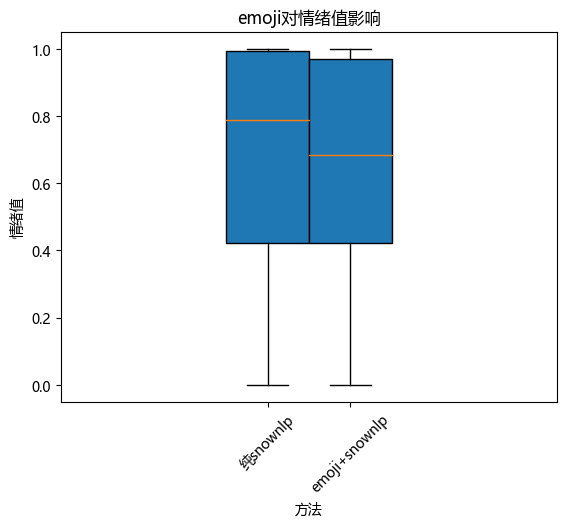

In [6]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
box_positions = [1 - 0.1, 1 + 0.1]  # 调整位置，使两个箱线图并排显示
box_width = 0.2

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用来正常显示中文标签
# plt.boxplot(data['snownlp'])
# plt.boxplot(data['snownlp+emoji'])

ax.boxplot(data['snownlp'], positions=[box_positions[0]], widths=box_width, patch_artist=True)
ax.boxplot(data['snownlp+emoji'], positions=[box_positions[1]], widths=box_width, patch_artist=True)
# 把箱子透明度增加，并将所有的散点也均匀画出来


# ax.set_xticks([box_positions[0], box_positions[1]])
ax.set_xticklabels(['纯snownlp', 'emoji+snownlp'],rotation=45)

ax.set_title('emoji对情绪值影响')
ax.set_xlabel('方法')
ax.set_ylabel('情绪值')

plt.show()

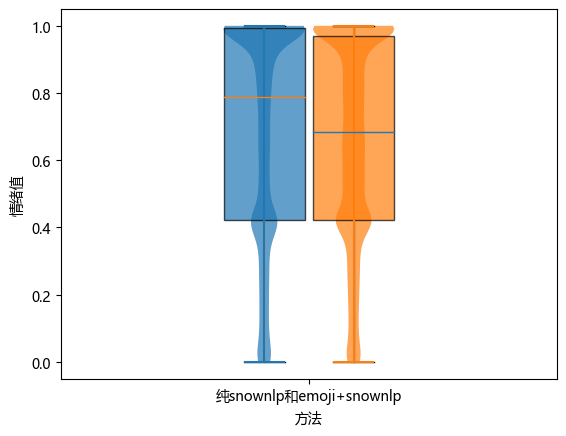

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig, ax = plt.subplots()
box_positions = [0.5 - 0.11, 0.5+ 0.11]  # 调整位置，使两个箱线图并排显示
box_width = 0.2

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

# 绘制箱线图
box1 = ax.boxplot(data['snownlp'], positions=[box_positions[0]], widths=box_width, patch_artist=True,
                  boxprops=dict(facecolor='#1f77b4', alpha=0.7),
                  medianprops=dict(color='#ff7f0e'),  # 设置中位数线的颜色
                  whiskerprops=dict(color='#ff7f0e'))  # 设置须的颜色
box2 = ax.boxplot(data['snownlp+emoji'], positions=[box_positions[1]], widths=box_width, patch_artist=True,
                  boxprops=dict(facecolor='#ff7f0e', alpha=0.7),
                  medianprops=dict(color='#1f77b4'),  # 设置中位数线的颜色
                  whiskerprops=dict(color='#1f77b4'))  # 设置须的颜色

# 绘制琴谱图
violin1 = ax.violinplot(data['snownlp'], positions=[box_positions[0]], widths=box_width, showmedians=False)
violin2 = ax.violinplot(data['snownlp+emoji'], positions=[box_positions[1]], widths=box_width, showmedians=False)

# 设置琴谱图的颜色和透明度
for violin, color in zip([violin1, violin2], ['#1f77b4', '#ff7f0e']):
    for pc in violin['bodies']:
        pc.set_facecolor(color)
        pc.set_alpha(0.7)

# 设置 x 轴标签
ax.set_xticks([0.5])
ax.set_xticklabels(['纯snownlp和emoji+snownlp'])

# 设置标题和轴标签
# ax.set_title('SnowNLP加emoji')
ax.set_xlabel('方法')
ax.set_ylabel('情绪值')

plt.show()


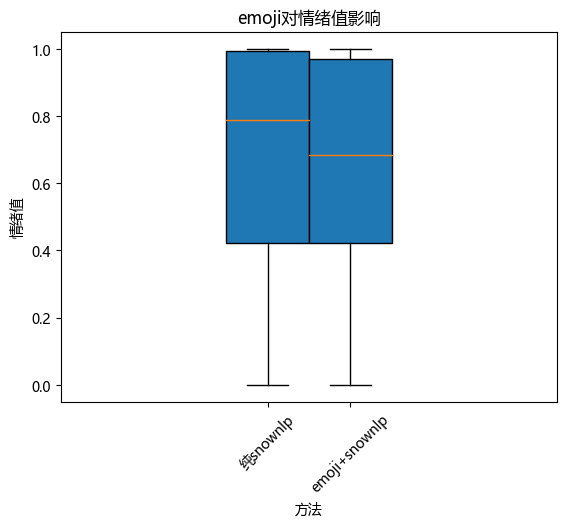

In [8]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
box_positions = [1 - 0.1, 1 + 0.1]  # 调整位置，使两个箱线图并排显示
box_width = 0.2

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用来正常显示中文标签
# plt.boxplot(data['snownlp'])
# plt.boxplot(data['snownlp+emoji'])

ax.boxplot(data['snownlp'], positions=[box_positions[0]], widths=box_width, patch_artist=True)
ax.boxplot(data['snownlp+emoji'], positions=[box_positions[1]], widths=box_width, patch_artist=True)
# 把箱子透明度增加，并将所有的散点也均匀画出来


# ax.set_xticks([box_positions[0], box_positions[1]])
ax.set_xticklabels(['纯snownlp', 'emoji+snownlp'],rotation=45)

ax.set_title('emoji对情绪值影响')
ax.set_xlabel('方法')
ax.set_ylabel('情绪值')

plt.show()

In [9]:
tmp=data.iloc[32405,data.columns.get_loc('jieba_cut')]
tmp

['上海音乐学院',
 '交响乐团',
 '音乐会',
 '带',
 '着',
 '微博去',
 '旅行',
 '视频',
 '遥遥',
 '视频',
 '手机',
 '摄影',
 '音乐',
 '音乐',
 '现场',
 '音乐会',
 '宇宙',
 '遥遥',
 '的',
 '\u200b',
 '\u200b',
 '\u200b',
 '\u200b']

In [10]:
import pandas as pd
from snownlp import SnowNLP

# 读取emoji数据
emoji_data = pd.read_csv('data/emoji_data.csv')

def jieba_cut_emoji_sentiment(text):
    sentiment = 0
    emojis = []
    emoji_sentiment = 0
    
    # 找出含有emoji_data的词，并从text中删除
    filtered_text = []
    for word in text:
        if word in emoji_data['pure_emoji'].values:
            emojis.append(word)
            emoji_sentiment += emoji_data[emoji_data['pure_emoji'] == word]['positive'].values[0]
        else:
            filtered_text.append(word)
    
    # 对剩下的text进行SnowNLP分析
    if filtered_text:
        sentiment += SnowNLP(' '.join(filtered_text)).sentiments
    
    # 计算总情感值
    total_sentiment = sentiment + emoji_sentiment
    
    # 计算平均情感值
    if filtered_text or emojis:
        average_sentiment = total_sentiment / (len(filtered_text) + len(emojis))
    else:
        average_sentiment = 0  # 如果没有文本和表情符号，平均情感值设为0
    
    return average_sentiment

# 示例用法
text=['😊','难受','坏了','不好']
text=['😊']
print(jieba_cut_emoji_sentiment(text))



0.8920999999999999


In [11]:
import numpy as np
import pandas as pd

emoji_data=pd.read_csv('data\emoji_data.csv')
# emoji_data.head()
def emoji_sentiment_analysis(text):
    te=[]
    for j in text:
        for i in range(len(emoji_data)):
            if emoji_data.loc[i,'pure_emoji']==j:
                print(emoji_data.iloc[i])
                te.append(emoji_data['positive'][i])
                break
    # 返回te中的所有数字的均值
    return np.mean(te)

k=emoji_sentiment_analysis(tmp)
k

d:\ProgramData\MachineLearning\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\ProgramData\MachineLearning\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


nan

In [12]:
emoji_data

,emoji,Confidence,negative,neutral,positive,pure_emoji
0,😀嘿嘿,0.476,0.0938,0.3364,0.5698,😀
1,😃哈哈,0.424,0.1064,0.3635,0.5301,😃
2,😄大笑,0.461,0.0823,0.3745,0.5432,😄
3,😁嘻嘻,0.687,0.0488,0.2155,0.7356,😁
4,😆斜眼笑,0.472,0.0825,0.3629,0.5546,😆
...,...,...,...,...,...,...
3266,🧛🏽‍♀️女吸血鬼：中等肤色,0.688,0.1250,0.0625,0.8125,🧛
3267,🧛🏽‍♂男吸血鬼: 中等肤色,-0.312,0.6234,0.0649,0.3117,🧛
3268,🧛🏽‍♂️男吸血鬼：中等肤色,-0.312,0.6234,0.0649,0.3117,🧛
3269,🧛🏾吸血鬼: 中等-深肤色,0.372,0.2442,0.1395,0.6163,🧛


In [21]:
import pandas as pd 

data=pd.read_csv('data\WeiboTrainData\loss7千.csv')
data.columns=['n','m','loss','c']
data

,n,m,loss,c
0,0,1,0.781161,2
1,0,2,0.655856,3
2,0,3,0.672339,4
3,0,4,0.634613,5
4,0,5,0.638017,6
5,0,6,0.584279,7
6,0,7,0.628074,8
7,0,8,0.595136,9
8,0,9,0.568521,10
9,0,10,0.546529,11


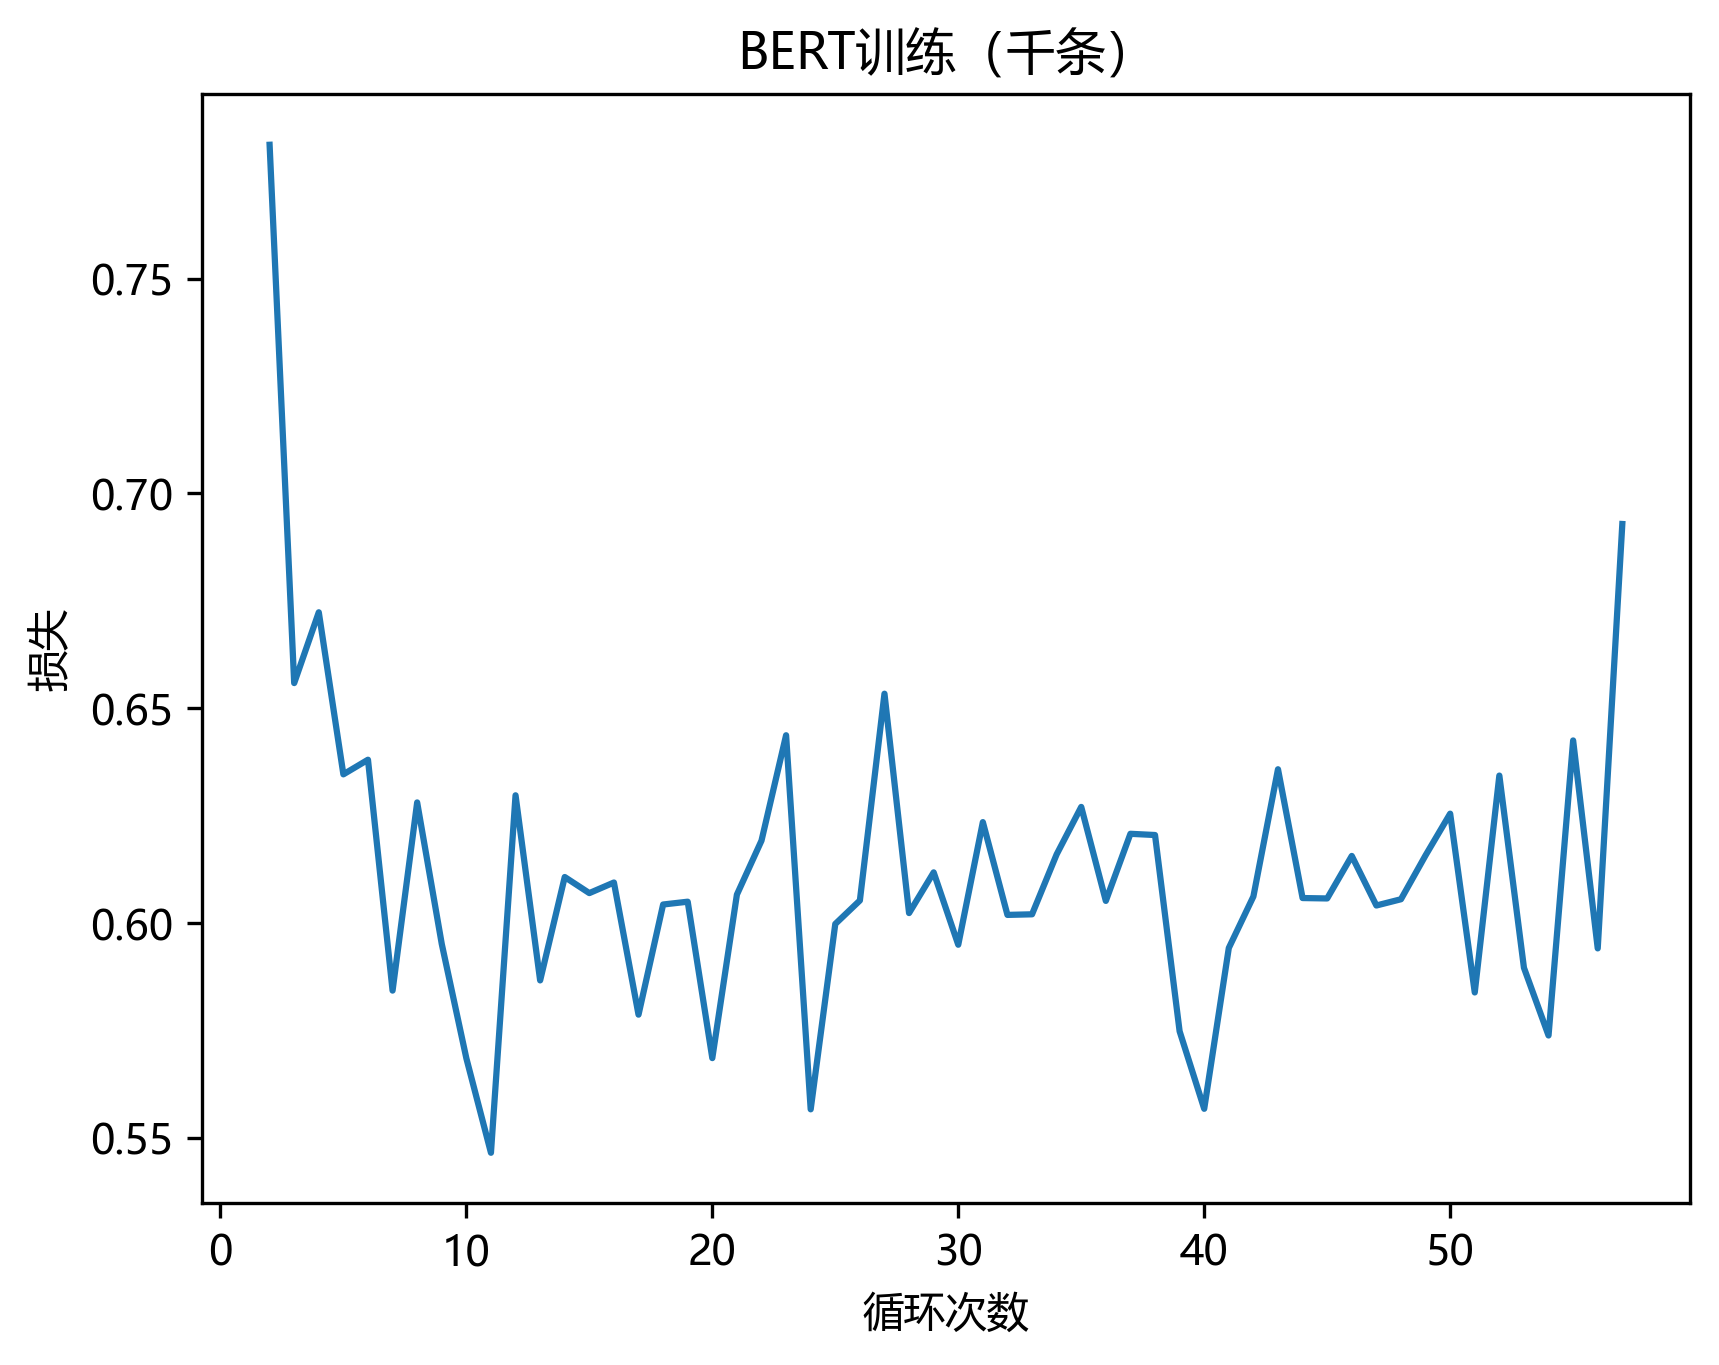

In [23]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用来正常显示中文标签
plt.figure(dpi=300)
plt.plot(data['c'],data['loss'])
plt.xlabel('循环次数')
plt.ylabel('损失')
plt.title('BERT训练（千条）')
# plt.legend()

plt.show()


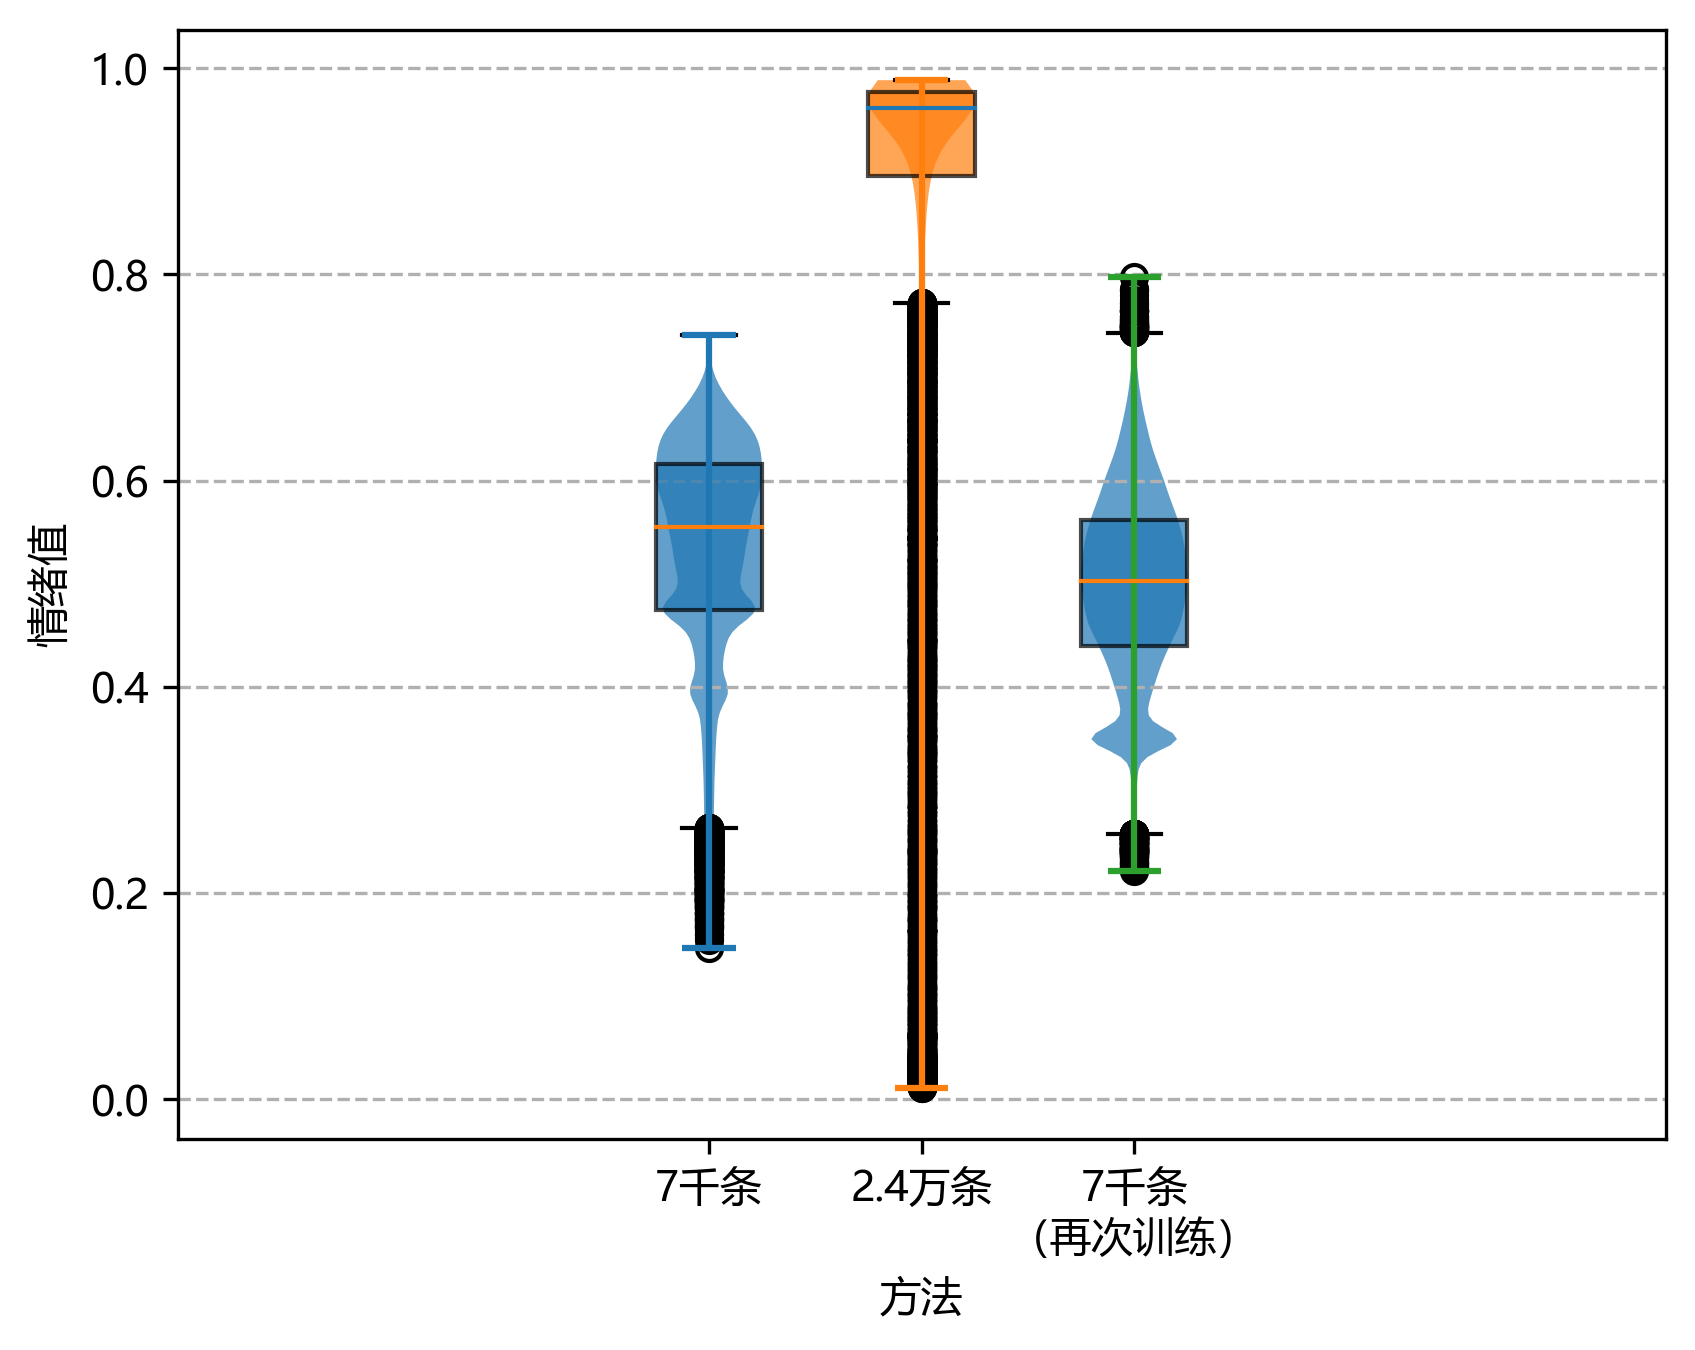

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data1=pd.read_csv('data\WeiboTrainData\sentiment_analysis_data_2024-06-28_1.csv')
data2=pd.read_csv('data\WeiboTrainData\sentiment_analysis_data_2024-06-29_2.csv')
data3=pd.read_csv('data\WeiboTrainData\sentiment_analysis_data_2024-06-29_3.csv')

fig, ax = plt.subplots(dpi=300)
box_width = 0.1
box_positions = [0.5 - box_width, 0.5,0.5+ box_width]  # 调整位置，使两个箱线图并排显示

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

# 绘制箱线图
box1 = ax.boxplot(data1['ad_prob'], positions=[box_positions[0]-box_width],widths=box_width, patch_artist=True,
                  boxprops=dict(facecolor='#1f77b4', alpha=0.7),
                  medianprops=dict(color='#ff7f0e'),  # 设置中位数线的颜色
                  whiskerprops=dict(color='#ff7f0e'))  # 设置须的颜色
box2 = ax.boxplot(data2['ad_prob'], positions=[box_positions[1]], widths=box_width, patch_artist=True,
                  boxprops=dict(facecolor='#ff7f0e', alpha=0.7),
                  medianprops=dict(color='#1f77b4'),  # 设置中位数线的颜色
                  whiskerprops=dict(color='#1f77b4'))  # 设置须的颜色
box2 = ax.boxplot(data3['ad_prob'], positions=[box_positions[2]+box_width], widths=box_width, patch_artist=True,
                  boxprops=dict(facecolor='#1f77b4', alpha=0.7),
                  medianprops=dict(color='#ff7f0e'),  # 设置中位数线的颜色
                  whiskerprops=dict(color='#ff7f0e'))  # 设置须的颜色

# 绘制琴谱图
violin1 = ax.violinplot(data1['ad_prob'], positions=[box_positions[0]-box_width],widths=box_width, showmedians=False)
violin2 = ax.violinplot(data2['ad_prob'], positions=[box_positions[1]], widths=box_width, showmedians=False)
violin3 = ax.violinplot(data3['ad_prob'], positions=[box_positions[2]+box_width], widths=box_width, showmedians=False)

# 设置琴谱图的颜色和透明度
for violin, color in zip([violin1,violin2,violin3], ['#1f77b4', '#ff7f0e','#1f77b4']):
    for pc in violin['bodies']:
        pc.set_facecolor(color)
        pc.set_alpha(0.7)

# 设置 x 轴标签
# ax.set_xticks([0.5])
ax.set_xticklabels(['7千条','2.4万条','7千条\n（再次训练）'])

# 设置标题和轴标签
# ax.set_title('SnowNLP加emoji')
ax.set_xlabel('方法')
ax.set_ylabel('情绪值')

plt.grid(axis='y',linestyle='--')

plt.show()


In [39]:
# tmp=data3[data3['pred']==0]
# tmm=data3[data3['pred']==1]
tmp=data2[data2['pred']==0]
tmm=data2[data2['pred']==1]
negative=tmp['pred'].count()
positive=tmm['pred'].count()

rate=positive/(negative+positive)
rate

In [1]:
import pandas as pd

data=pd.read_csv(r'out\buffer\20191001_20191101 Residents.csv')
data.to_csv(r"out\buffer\20191001_20191101 Residents.csv",index=False,encoding='utf-8-sig') 
data

,mid,lat,lng,user_name,user_link,verify_typ,weibo_link,publish_time,content,image_urls,...,wgs_lat,clean_content,jieba_cut,baidu_confidence,baidu_negative,baidu_positive,baidu_sentiment,fid,Id,Floor
0,4.422370e+15,31.151087,121.810866,岁月无恙_qq,https://weibo.com/qianqian0618,没有认证,https://weibo.com/2942205903/I9o0umEal,2019/10/1 0:00,飞✈️#我和我的祖国# 祝祖国母亲生日快乐🎉🎈🎊 2上海·浦东机场T2国际出发,https://wx3.sinaimg.cn/large/af5e7fcfly1g7hzh8...,...,31.153202,飞我和我的祖国祝祖国母亲生日快乐,"['飞', '我', '和', '我', '的', '祖国', '祝', '祖国', '母亲...",0.999705,0.000133,0.999867,2,533105,0,2
1,4.422370e+15,31.151087,121.810866,岁月无恙_qq,https://weibo.com/qianqian0618,没有认证,https://weibo.com/2942205903/I9o0umEal,2019/10/1 0:00,飞✈️#我和我的祖国# 祝祖国母亲生日快乐🎉🎈🎊 2上海·浦东机场T2国际出发,https://wx3.sinaimg.cn/large/af5e7fcfly1g7hzh8...,...,31.153202,飞我和我的祖国祝祖国母亲生日快乐,"['飞', '我', '和', '我', '的', '祖国', '祝', '祖国', '母亲...",0.999705,0.000133,0.999867,2,533173,0,2
2,4.422370e+15,31.264651,121.538895,爱神海豚,https://weibo.com/u/7064395123,没有认证,https://weibo.com/7064395123/I9o0vz6zz,2019/10/1 0:00,"<img class=""W_img_face"" render=""ext"" src=""http...",https://wx1.sinaimg.cn/large/007I5tSPly1g7hz45...,...,31.266764,蛋糕蛋糕祖国生日快乐蛋糕蛋糕我为你守零点我和我的祖国一刻也不能分割我心心你中国心心心心心心心...,"['蛋糕', '蛋糕', '祖国', '生日快乐', '蛋糕', '蛋糕', '我', '为...",0.999933,0.000030,0.999970,2,428315,0,8
3,4.422370e+15,31.264651,121.538895,爱神海豚,https://weibo.com/u/7064395123,没有认证,https://weibo.com/7064395123/I9o0vz6zz,2019/10/1 0:00,"<img class=""W_img_face"" render=""ext"" src=""http...",https://wx1.sinaimg.cn/large/007I5tSPly1g7hz45...,...,31.266764,蛋糕蛋糕祖国生日快乐蛋糕蛋糕我为你守零点我和我的祖国一刻也不能分割我心心你中国心心心心心心心...,"['蛋糕', '蛋糕', '祖国', '生日快乐', '蛋糕', '蛋糕', '我', '为...",0.999933,0.000030,0.999970,2,428317,0,9
4,4.422370e+15,31.264651,121.538895,爱神海豚,https://weibo.com/u/7064395123,没有认证,https://weibo.com/7064395123/I9o0vz6zz,2019/10/1 0:00,"<img class=""W_img_face"" render=""ext"" src=""http...",https://wx1.sinaimg.cn/large/007I5tSPly1g7hz45...,...,31.266764,蛋糕蛋糕祖国生日快乐蛋糕蛋糕我为你守零点我和我的祖国一刻也不能分割我心心你中国心心心心心心心...,"['蛋糕', '蛋糕', '祖国', '生日快乐', '蛋糕', '蛋糕', '我', '为...",0.999933,0.000030,0.999970,2,428318,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43431,4.433610e+15,31.211230,121.556025,FRAnnieee,https://weibo.com/u/2191026683,没有认证,https://weibo.com/2191026683/Ie6dCBkzf,2019/10/31 23:54,快乐源泉胡凯莉 2上海·浦东世纪花园(西区) ​​​​,https://wx2.sinaimg.cn/large/829869fbgy1g8hths...,...,31.213403,快乐源泉胡凯莉,"['快乐', '源泉', '胡凯莉']",0.998636,0.000614,0.999386,2,447624,0,22
43432,4.433610e+15,31.376566,121.493477,迷噔虫,https://weibo.com/u/6004558088,没有认证,https://weibo.com/6004558088/Ie6ex5hqi,2019/10/31 23:56,得到的都是侥幸，失去的才是人生。 2上海·宝房集团海滨新村小区,https://wx2.sinaimg.cn/large/006ymvR6ly1g8htna...,...,31.378508,得到的都是侥幸失去的才是人生,"['得到', '的', '都', '是', '侥幸', '失去', '的', '才', '是...",0.576453,0.809404,0.190596,0,373252,0,5
43433,4.433610e+15,31.261018,121.657886,圆脸妹·Ira,https://weibo.com/u/6008714701,没有认证,https://weibo.com/6008714701/Ie6eq0fUJ,2019/10/31 23:56,#今天你是什么鬼# 你的小鬼呀@橙煮冰JJY @奶茶去冰少糖珍珠椰果都要 #上海# 2上海·...,https://wx3.sinaimg.cn/large/006yDXbfgy1g8htne...,...,31.263141,今天你是什么鬼你的小鬼呀橙煮冰奶茶去冰少糖珍珠椰果都要上海,"['今天', '你', '是', '什么', '鬼', '你', '的', '小鬼', '呀...",0.998051,0.999123,0.000877,0,520198,0,5
43434,4.433610e+15,31.207168,121.407810,#NAME?,https://weibo.com/u/1764340445,没有认证,https://weibo.com/1764340445/Ie6eH4gpl,2019/10/31 23:57,真的要加班加爆了 2上海·虹桥上海城购物中心,https://wx3.sinaimg.cn/large/6929b2ddgy1g8htnz...,...,31.209015,真的要加班加爆了,"['真的', '要', '加班', '加爆', '了']",0.850512,0.932730,0.067270,0,240364,0,5


In [14]:
import pandas as pd 

data = pd.read_excel(r'data\上海疫情\2022疫情通报_上海市卫生健康委员会.xlsx')
data.columns = ['source_html', 'content', 'time']
# 从content列中筛选出含有 '例'、'新增'、'年'、'月'、'日' 字的行
keywords = '例|新增|年|月|日|上海'
data = data[data['content'].str.contains(keywords, na=False)]
# 筛选出开头为上海的行
data = data[data['content'].str.startswith('上海', na=False)]
# 删除含有 风险 的行
data = data[~data['content'].str.contains('风险', na=False)]

data.to_csv(r'data\上海疫情\2022年_每日疫情通报_上海市卫生健康委员会.csv', index=False, encoding='utf-8-sig')


In [21]:
import pandas as pd
import re

# 读取数据
data = pd.read_csv(r'data\上海疫情\2022年_每日疫情通报_上海市卫生健康委员会.csv')

# 删除content列中，含有 解除 或 治愈 及后面的字符串，添加到content_clean列
data['content_clean'] = data['content'].apply(lambda x: re.sub(r'解除|治愈.*', '', x))

data.to_csv(r'data\上海疫情\2022年_每日疫情通报_上海市卫生健康委员会.csv', index=False, encoding='utf-8-sig')

In [18]:
import pandas as pd
import re

# 读取数据
data = pd.read_csv(r'data\上海疫情\2022年_每日疫情通报_上海市卫生健康委员会.csv')

# 提取content列中字符串中的数字，舍弃前3组数字，将剩下的数字求和，添加到新列
def extract_and_sum(content):
    # 提取所有数字
    numbers = re.findall(r'\d+', content)
    # 转换为整数类型
    numbers = list(map(int, numbers))
    # 舍弃前3组数字
    numbers = numbers[3:]
    # 求和
    return sum(numbers)

# 添加新列
data['sum_of_later_numbers'] = data['content'].apply(extract_and_sum)

data.to_csv(r'data\上海疫情\2022年_每日疫情通报_上海市卫生健康委员会_数字.csv', index=False, encoding='utf-8-sig')

# 显示结果
data


,source_html,content,time,content_clean,sum_of_later_numbers
0,https://wsjkw.sh.gov.cn/xwfb/20221209/88f95650...,上海2022年12月8日，新增本土新冠肺炎确诊病例28例 新增本土无症状感染者303例 新增...,2022/12/9,上海2022年12月8日，新增本土新冠肺炎确诊病例28例 新增本土无症状感染者303例 新增...,387
1,https://wsjkw.sh.gov.cn/xwfb/20221208/d3528871...,上海2022年12月7日，新增本土新冠肺炎确诊病例39例 新增本土无症状感染者327例 新增...,2022/12/8,上海2022年12月7日，新增本土新冠肺炎确诊病例39例 新增本土无症状感染者327例 新增...,448
2,https://wsjkw.sh.gov.cn/xwfb/20221207/5da4b87a...,上海2022年12月6日，新增本土新冠肺炎确诊病例24例 新增本土无症状感染者454例 新增...,2022/12/7,上海2022年12月6日，新增本土新冠肺炎确诊病例24例 新增本土无症状感染者454例 新增...,555
3,https://wsjkw.sh.gov.cn/xwfb/20221206/422787ca...,上海2022年12月5日，新增本土新冠肺炎确诊病例41例 新增本土无症状感染者536例 新增...,2022/12/6,上海2022年12月5日，新增本土新冠肺炎确诊病例41例 新增本土无症状感染者536例 新增...,626
4,https://wsjkw.sh.gov.cn/xwfb/20221205/1a17153d...,上海2022年12月4日，新增本土新冠肺炎确诊病例41例 新增本土无症状感染者524例 新增...,2022/12/5,上海2022年12月4日，新增本土新冠肺炎确诊病例41例 新增本土无症状感染者524例 新增...,627
...,...,...,...,...,...
376,https://wsjkw.sh.gov.cn/xwfb/20211117/594e2a96...,上海2021年11月16日，无新增本地新冠肺炎确诊病例 新增境外输入1例 治愈出院4例,2021/11/17,上海2021年11月16日，无新增本地新冠肺炎确诊病例 新增境外输入1例,5
377,https://wsjkw.sh.gov.cn/xwfb/20211116/5b98f692...,上海2021年11月15日，无新增本地新冠肺炎确诊病例 新增境外输入2例 治愈出院6例,2021/11/16,上海2021年11月15日，无新增本地新冠肺炎确诊病例 新增境外输入2例,8
378,https://wsjkw.sh.gov.cn/xwfb/20211115/fc938308...,上海2021年11月14日，无新增本地新冠肺炎确诊病例 新增境外输入5例 治愈出院3例,2021/11/15,上海2021年11月14日，无新增本地新冠肺炎确诊病例 新增境外输入5例,8
379,https://wsjkw.sh.gov.cn/xwfb/20211114/8d0047c3...,上海2021年11月13日，无新增本地新冠肺炎确诊病例 新增境外输入5例 治愈出院5例,2021/11/14,上海2021年11月13日，无新增本地新冠肺炎确诊病例 新增境外输入5例,10


In [13]:
import pandas as pd

data=pd.read_csv("D:\Code\Python\社交媒体情感\out\相关性表.csv")
data

,FID,Join_Count,TARGET_FID,FID_202203,FID_1,FID_JW_1,Count_,FID_0813_,FID_JW_12,文盲,...,健康_外,基健_常,基健_外,不健_常,不健_外,不理_常,不理_外,baidu_conf,baidu_nega,baidu_posi
0,0,12,0,0,7,8,12,7,8,46,...,3,42,6,5,0,3,0,0.813931,0.249060,0.750940
1,1,73,1,1,9,10,73,9,10,45,...,1,15,1,2,0,0,0,0.831367,0.201963,0.798037
2,2,24,2,2,29,30,24,29,30,52,...,5,5,0,3,0,0,0,0.751338,0.518134,0.481866
3,3,13,3,3,46,47,13,46,47,90,...,1,28,0,9,0,4,0,0.744008,0.499547,0.500453
4,4,23,4,4,71,73,23,71,73,32,...,0,20,0,4,0,2,0,0.780978,0.224307,0.775693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,249,11,249,249,2126,2532,11,2340,2532,133,...,3,44,0,8,0,3,0,0.918480,0.709286,0.290713
250,250,18,250,250,2173,2604,18,2398,2604,64,...,10,93,6,13,1,3,0,0.659934,0.213962,0.786038
251,251,22,251,251,2177,2608,22,2402,2608,61,...,2,19,1,9,0,2,0,0.815980,0.427740,0.572260
252,252,11,252,252,2181,2613,11,2406,2613,26,...,13,8,8,0,0,0,0,0.720429,0.182228,0.817771


相关性系数: 0.23218191158545112


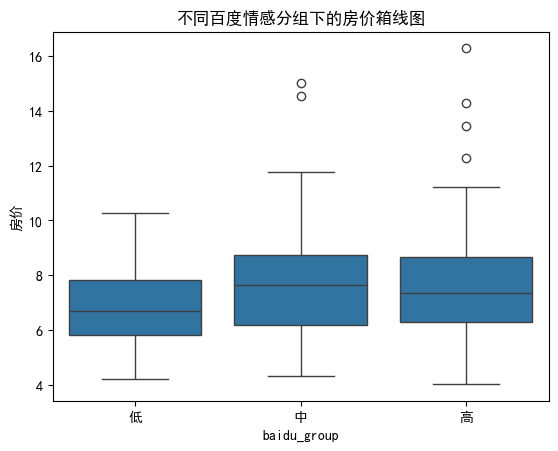

t-statistics: -3.3767202173446997
p-value: 0.0009487355583204597
显著，拒绝原假设，认为房价和百度百科情感相关


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签    

# 计算相关性
correlation = data['baidu_posi'].corr(data['房价'])
print('相关性系数:', correlation)

# 根据baidu_posi将数据分成高、中、低三组
data['baidu_group'] = pd.qcut(data['baidu_posi'], q=3, labels=['低', '中', '高'])

# 画箱线图
sns.boxplot(x='baidu_group', y='房价', data=data)
plt.title('不同百度情感分组下的房价箱线图')
plt.show()

# 进行显著性检验
low_group = data[data['baidu_group'] == '低']['房价']
high_group = data[data['baidu_group'] == '高']['房价']
t, p = ttest_ind(low_group, high_group, equal_var=False)  # 使用方差不齐假设

print('t-statistics:', t)
print('p-value:', p)
if p < 0.05:
    print('显著，拒绝原假设，认为房价和百度百科情感相关')
else:
    print('不显著，不能拒绝原假设，认为房价和百度百科情感不相关')


In [4]:
print(data.columns)

Index(['FID', 'Join_Count', 'TARGET_FID', 'FID_202203', 'FID_1', 'FID_JW_1',
       'Count_', 'FID_0813_', 'FID_JW_12', '文盲', '小学', '初中', '高中', '大专', '本科',
       '硕士', '博士', '儿童', '老人', '男性', '女性', '常住人', '流动人', '少数民', '总人口', '房价',
       '配子_常', '配子_外', '配同_常', '配同_外', '子同_常', '子同_外', '独姆_常', '独姆_外', '无姆_常',
       '无姆_外', '养老_常', '养老_外', '其他_常', '其他_外', '健康_常', '健康_外', '基健_常', '基健_外',
       '不健_常', '不健_外', '不理_常', '不理_外', 'baidu_conf', 'baidu_nega',
       'baidu_posi'],
      dtype='object')


##### 因变量
- 情感值（由 `baidu_positive` 和 `baidu_negative` 计算得来）：${\text{baidu\_positive}}\;\;{\text{baidu\_negative}} \in [0,1]$

##### 自变量包括
- 可视草地面积：$\frac{\text{grass}}{\text{buffer\_area}}$
- 可视树木面积：$\frac{\text{forest}}{\text{buffer\_area}}$
- 可视树木加草地面积：$\frac{\text{forest}+\text{grass}}{\text{buffer\_area}}$
- 可视水体面积：$\frac{\text{river}+\text{pool}}{\text{buffer\_area}}$
- 可视水体、树木、草地总面积：$\frac{\text{river}+\text{pool}+\text{forest}+\text{grass}}{\text{buffer\_area}}$
- 男性人口百分比：$\frac{\text{male}}{\text{total\_population}}$
- 女性人口百分比：$\frac{\text{female}}{\text{total\_population}}$
- 人口密度：$\frac{\text{total\_population}}{\text{area}}$
- 儿童人口比例：$\frac{\text{children}}{\text{total\_population}}$
- 老年人口比例：$\frac{\text{elderly}}{\text{total\_population}}$
- 成年人口比例：$\frac{\text{adult}}{\text{total\_population}}$
- 结婚人口比例：$\frac{\text{married}}{\text{total\_population}}$
- 单身离婚或丧偶人口比例：$\frac{\text{single\_divorce}}{\text{total\_population}}$
- 房价：$\log(\text{house\_price}) \in [0,1]$
- 本地户口人数比例：$\frac{\text{local\_population}}{\text{total\_population}}$
- 外地户口人数比例：$\frac{\text{foreign\_population}}{\text{total\_population}}$
- 文盲人口比例：$\frac{\text{illiterate}}{\text{total\_population}}$
- 小学人口比例：$\frac{\text{elementary\_school}}{\text{total\_population}}$
- 中学人口比例：$\frac{\text{middle\_school}}{\text{total\_population}}$
- 大学人口比例：$\frac{\text{university}}{\text{total\_population}}$
- 人均住宅面积：$\frac{\text{total\_population}}{\text{area}}$


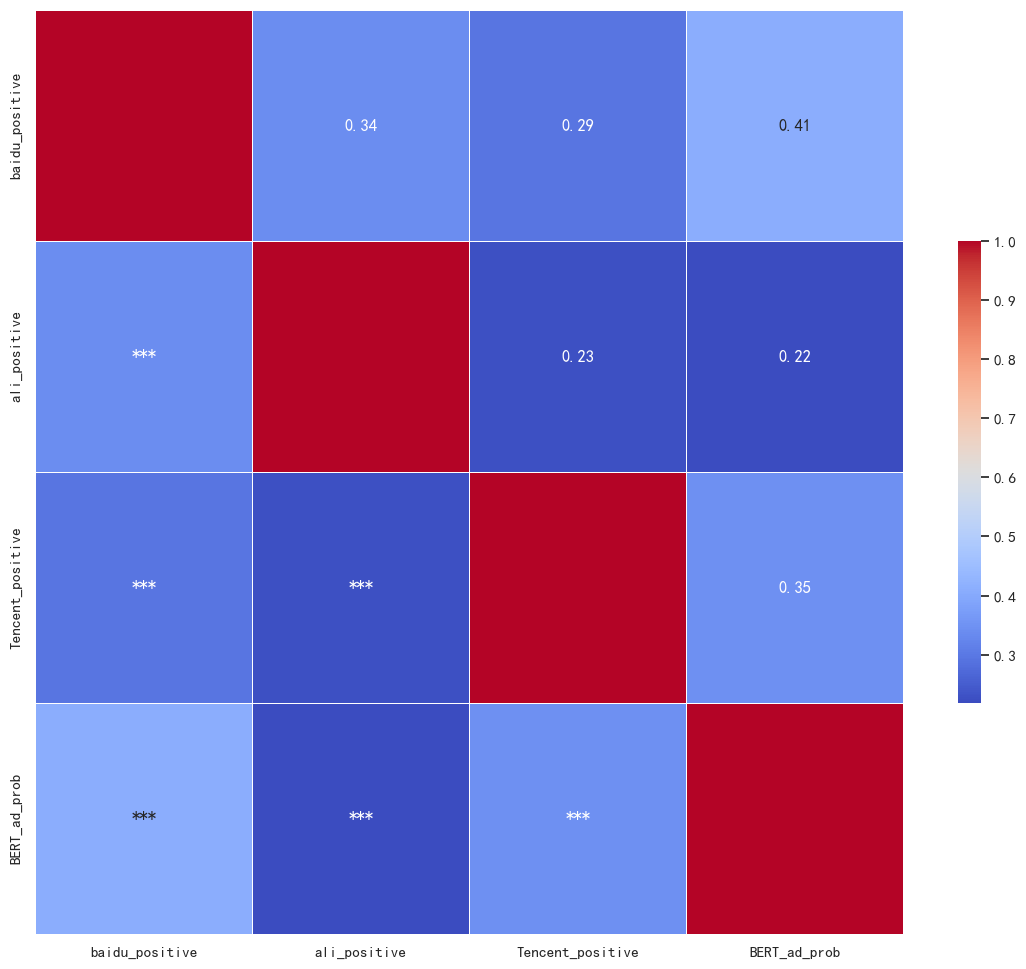

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# 读取CSV文件
file_path = r'data/上海2019_2023年按月分类文件_情绪值/对比验证/20190301_20190401 26184 条_Baidu&Tencent&BERT&Ali 21747 条.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

# 选择实际需要的列
selected_columns = [
    'baidu_positive','ali_positive','Tencent_positive','BERT_ad_prob'
]

# 筛选出需要的列
df_selected = df[selected_columns]

# 计算相关性矩阵
corr = df_selected.corr()

# 进行独立T检验
p_values = np.zeros((len(selected_columns), len(selected_columns)))

for i in range(len(selected_columns)):
    for j in range(len(selected_columns)):
        if i != j:
            # 进行T检验
            stat, p = stats.ttest_ind(df_selected[selected_columns[i]], df_selected[selected_columns[j]], nan_policy='omit')
            p_values[i, j] = p

# 将p值转换为星号格式
def significance(p_val):
    if p_val < 0.001:
        return '***'
    elif p_val < 0.01:
        return '**'
    elif p_val < 0.05:
        return '*'
    else:
        return ''

significance_matrix = np.vectorize(significance)(p_values)

# 合并相关性和星号矩阵
annot_matrix = np.empty(corr.shape, dtype=object)
for i in range(len(selected_columns)):
    for j in range(len(selected_columns)):
        if i < j:
            annot_matrix[i, j] = f"{corr.iat[i, j]:.2f}"  # 右上部分显示相关性
        elif i > j:
            annot_matrix[i, j] = significance_matrix[i, j]  # 左下部分显示星号
        else:
            annot_matrix[i, j] = ''  # 对角线部分为空

# 设置绘图风格
sns.set(style="white")

# 设置绘图尺寸
plt.figure(figsize=(14, 12))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 创建相关性矩阵热图
sns.heatmap(corr, annot=annot_matrix, fmt="", cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': 0.5})

# 添加标题
# plt.title('Feature Correlation Heatmap with T-test Significance', fontsize=18)

# 显示图形
plt.show()


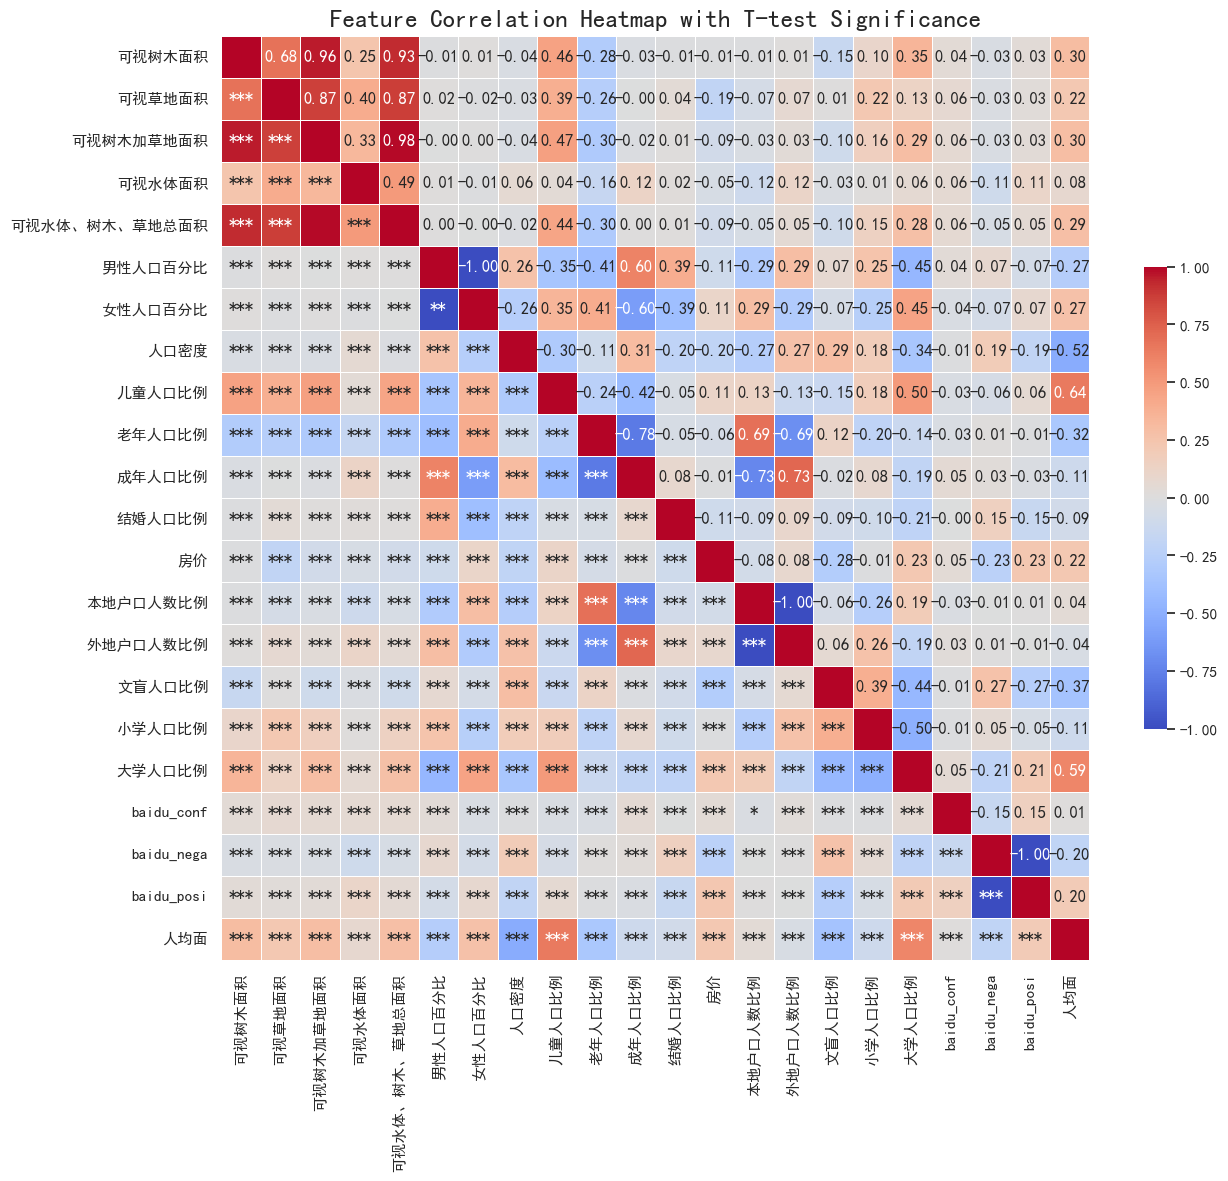

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# 读取CSV文件
file_path = r'd:\Code\.Data\0813-七普小区\output\七普小区_情感社会视域_预处理.xlsx'  # 替换为你的CSV文件路径
df = pd.read_excel(file_path)

# 选择实际需要的列
selected_columns = [
    '可视树木面积', '可视草地面积', '可视树木加草地面积', '可视水体面积', 
    '可视水体、树木、草地总面积', '男性人口百分比', '女性人口百分比', 
    '人口密度', '儿童人口比例', '老年人口比例', '成年人口比例', 
    '结婚人口比例', '房价', '本地户口人数比例', 
    '外地户口人数比例', '文盲人口比例', '小学人口比例', 
    '大学人口比例', 'baidu_conf', 'baidu_nega', 
    'baidu_posi', '人均面'
]

# 筛选出需要的列
df_selected = df[selected_columns]

# 计算相关性矩阵
corr = df_selected.corr()

# 进行独立T检验
p_values = np.zeros((len(selected_columns), len(selected_columns)))

for i in range(len(selected_columns)):
    for j in range(len(selected_columns)):
        if i != j:
            # 进行T检验
            stat, p = stats.ttest_ind(df_selected[selected_columns[i]], df_selected[selected_columns[j]], nan_policy='omit')
            p_values[i, j] = p

# 将p值转换为星号格式
def significance(p_val):
    if p_val < 0.001:
        return '***'
    elif p_val < 0.01:
        return '**'
    elif p_val < 0.05:
        return '*'
    else:
        return ''

significance_matrix = np.vectorize(significance)(p_values)

# 合并相关性和星号矩阵
annot_matrix = np.empty(corr.shape, dtype=object)
for i in range(len(selected_columns)):
    for j in range(len(selected_columns)):
        if i < j:
            annot_matrix[i, j] = f"{corr.iat[i, j]:.2f}"  # 右上部分显示相关性
        elif i > j:
            annot_matrix[i, j] = significance_matrix[i, j]  # 左下部分显示星号
        else:
            annot_matrix[i, j] = ''  # 对角线部分为空

# 设置绘图风格
sns.set(style="white")

# 设置绘图尺寸
plt.figure(figsize=(14, 12))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 创建相关性矩阵热图
sns.heatmap(corr, annot=annot_matrix, fmt="", cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': 0.5})

# 添加标题
plt.title('Feature Correlation Heatmap with T-test Significance', fontsize=18)

# 显示图形
plt.show()


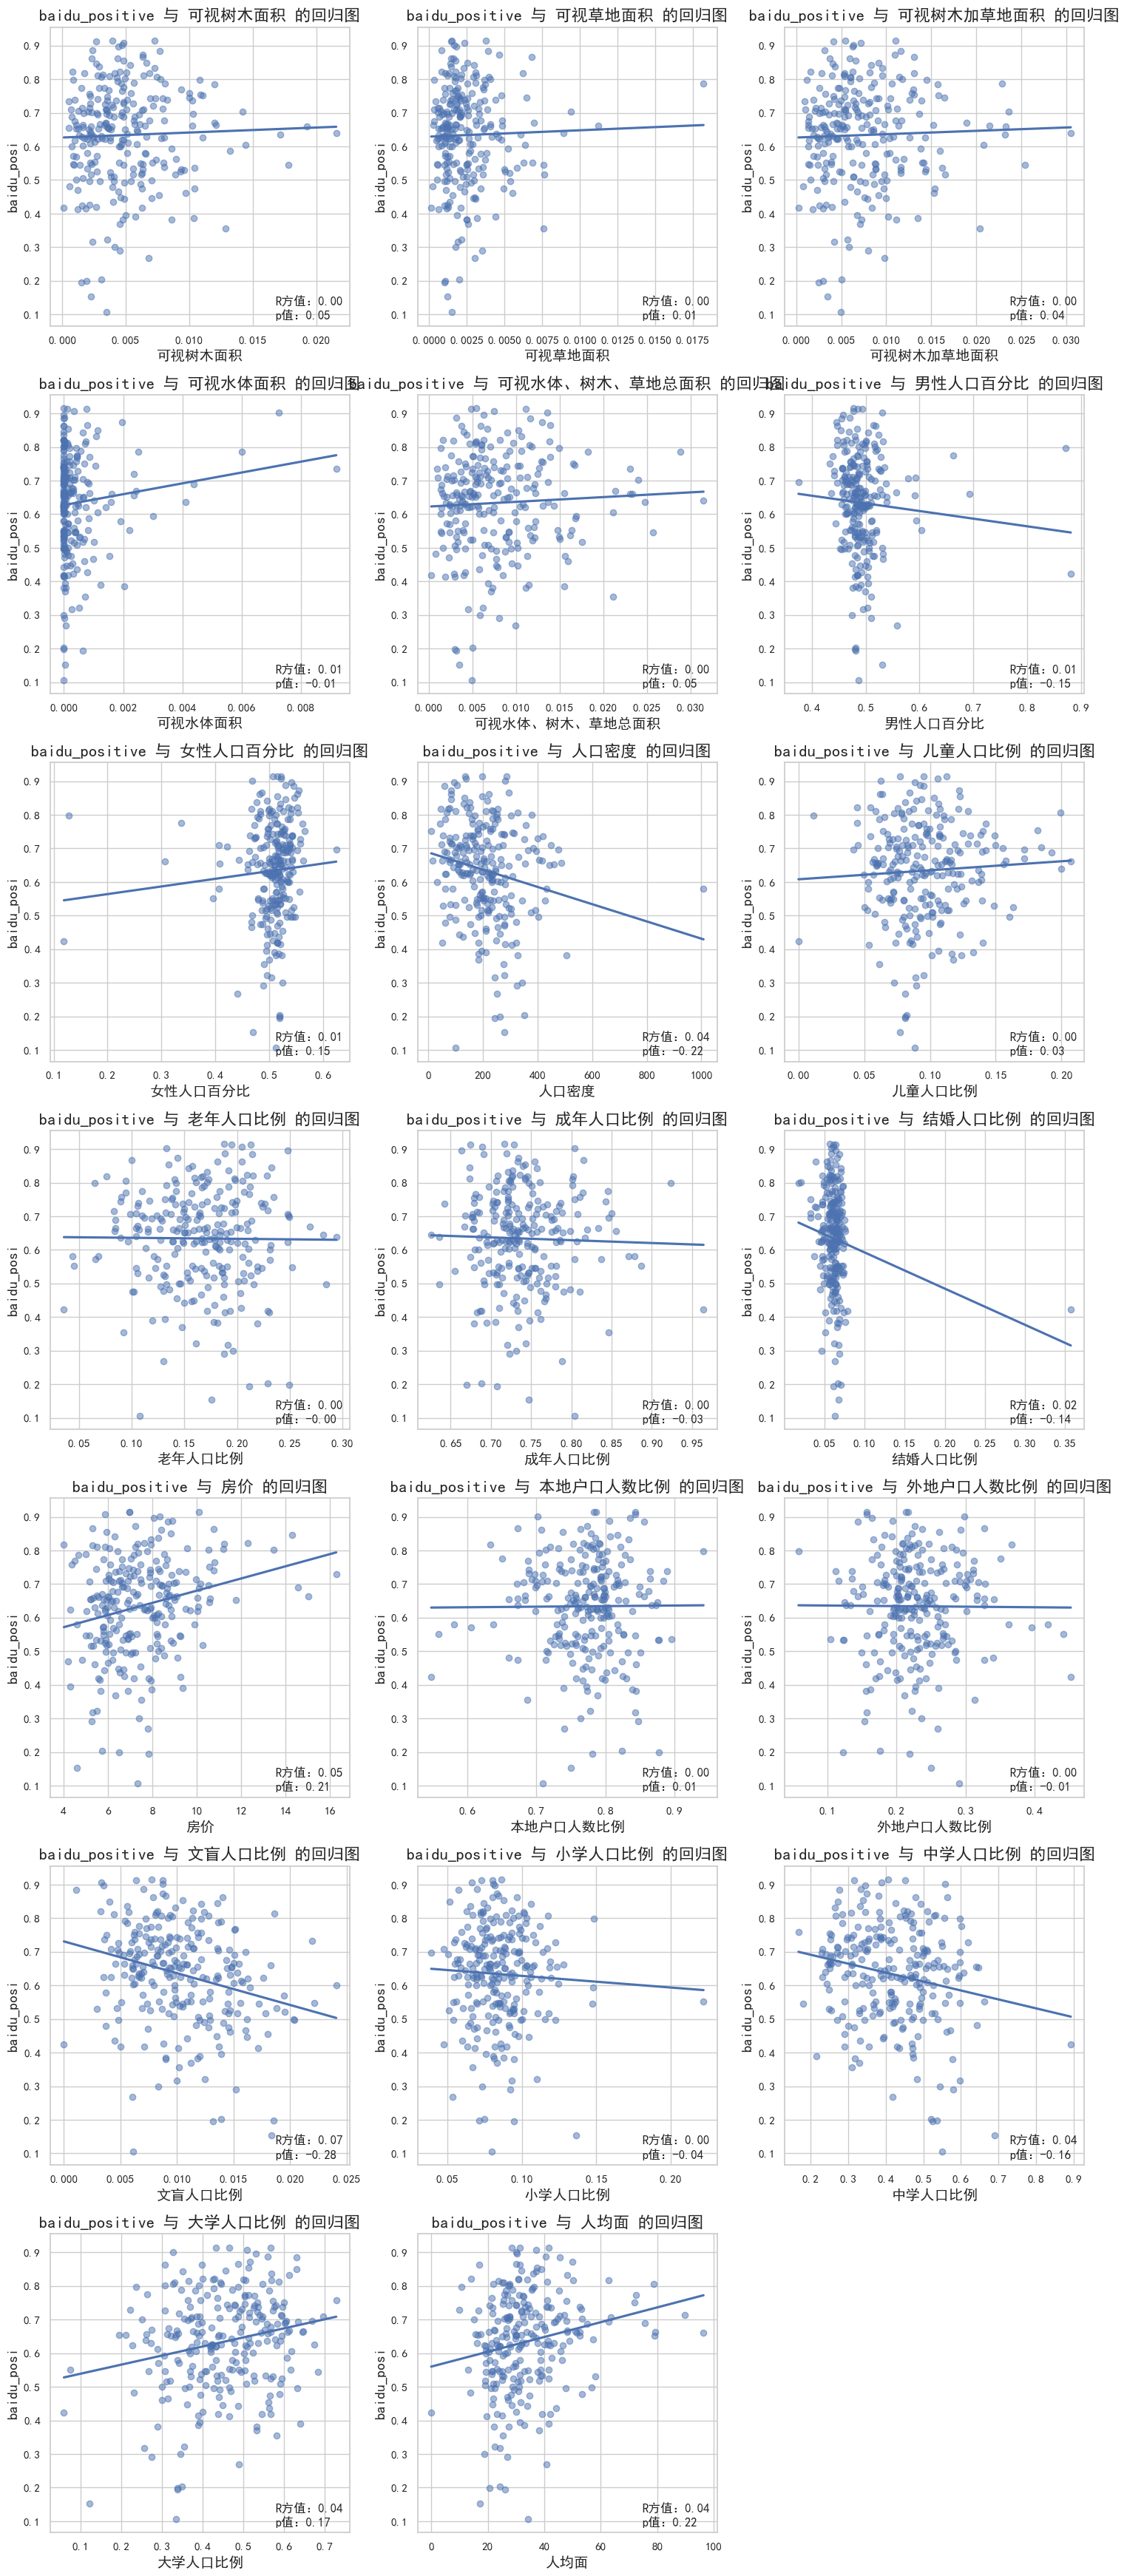

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = r'd:\Code\.Data\0813-七普小区\output\七普小区_情感社会视域_预处理.xlsx'  # 替换为你的CSV文件路径
df = pd.read_excel(file_path)

# 选择实际需要的列
selected_columns = [
    '可视树木面积', '可视草地面积', '可视树木加草地面积', '可视水体面积', 
    '可视水体、树木、草地总面积', '男性人口百分比', '女性人口百分比', 
    '人口密度', '儿童人口比例', '老年人口比例', '成年人口比例', 
    '结婚人口比例', '房价', '本地户口人数比例', 
    '外地户口人数比例', '文盲人口比例', '小学人口比例', '中学人口比例',
    '大学人口比例','baidu_posi', '人均面'
]

# 筛选出需要的列
df_selected = df[selected_columns]

# 以 'baidu_posi' 为因变量，绘制回归图
dependent_var = 'baidu_posi'
independent_vars = [col for col in selected_columns if col != dependent_var]

# 设置绘图风格
sns.set(style="whitegrid")

# 设置绘图尺寸
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 计算子图行数
num_vars = len(independent_vars)
num_cols = 3  # 每行3列
num_rows = (num_vars + num_cols - 1) // num_cols  # 向上取整

# 创建子图
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# 平铺axes数组以便于循环处理
axes = axes.flatten()

# 每个自变量绘制一个回归图 
for i, var in enumerate(independent_vars):
    # 绘制散点图及回归线
    sns.regplot(x=var, y=dependent_var, data=df_selected, ci=None, scatter_kws={'alpha': 0.5}, ax=axes[i])
    
    # 添加标题和标签
    axes[i].set_title(f'{dependent_var}tive 与 {var} 的回归图', fontsize=16)
    # axes[i].set_title(f'Regretion for\tpositive and {var}', fontsize=16)
    axes[i].set_xlabel(var, fontsize=14)
    axes[i].set_ylabel(dependent_var, fontsize=14)

    # 计算R方值和p值
    r, p = df_selected[dependent_var].corr(df_selected[var])**2, df_selected[dependent_var].corr(df_selected[var], method='spearman')
    axes[i].text(0.75, 0.1, f'R方值：{r:.2f}\np值：{p:.2f}', transform=axes[i].transAxes, fontsize=12, verticalalignment='top')

# 隐藏多余的子图
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

# 调整布局
plt.tight_layout()
# 显示图形
plt.show()
